<a href="https://colab.research.google.com/github/fsndzomga/Deep-Learning-With-Python/blob/main/Keras_and_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf

x = tf.ones(shape= (2,1))

print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [8]:
x = tf.zeros(shape=(2,1))

print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Random tensors

In [9]:
x = tf.random.normal(shape=(3,1), mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[-0.16392358]
 [-0.5322121 ]
 [ 0.09508478]], shape=(3, 1), dtype=float32)


In [10]:
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.04785907]
 [0.4471017 ]
 [0.24998403]], shape=(3, 1), dtype=float32)


In [11]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.651195  ],
       [-0.77502334],
       [-0.7278216 ]], dtype=float32)>


In [12]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [13]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [14]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [15]:
a = tf.ones((2,2))

b = tf.square(a)

c = tf.sqrt(a)

d = b + c

e = tf.matmul(a,b)

e *= d

In [16]:
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [17]:
from numpy.lib.function_base import gradient
input_var = tf.Variable(initial_value=3.0)

with tf.GradientTape() as tape:
  result = tf.square(input_var)

gradient = tape.gradient(result, input_var)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [18]:
import numpy as np

num_samples_per_class = 1000

negative_sample = np.random.multivariate_normal(mean=[0,3],cov=[[1.0,0.5],[0.5,1.0]], size=num_samples_per_class)

positive_sample = np.random.multivariate_normal(mean=[3,0], cov=[[1.0,0.5],[0.5,1.0]], size=num_samples_per_class)

inputs = np.vstack((negative_sample, positive_sample)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1), dtype ="float32"),np.ones((num_samples_per_class,1),dtype="float32")))

Plotting data with matplotlib

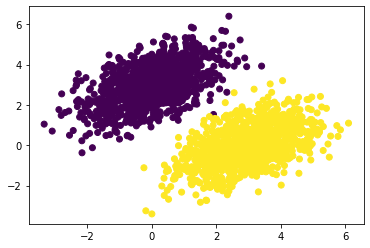

In [19]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])

plt.show()

Creating the linear classifier variables

In [20]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value= tf.random.uniform(shape=(input_dim, output_dim)))

b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Forward pass function

In [21]:
def model(inputs):
  return tf.matmul(inputs, W) + b


Mean squared error loss function

In [22]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

Training step function

In [23]:
from tensorflow.python.framework.auto_control_deps_utils import get_read_only_resource_input_indices_graph
learning_rate = 0.01

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W,grand_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grand_loss_wrt_b * learning_rate)
  
  return loss

Batch training loop

In [28]:
for step in range(200):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0555
Loss at step 1: 0.0552
Loss at step 2: 0.0549
Loss at step 3: 0.0547
Loss at step 4: 0.0544
Loss at step 5: 0.0541
Loss at step 6: 0.0539
Loss at step 7: 0.0536
Loss at step 8: 0.0533
Loss at step 9: 0.0531
Loss at step 10: 0.0528
Loss at step 11: 0.0526
Loss at step 12: 0.0523
Loss at step 13: 0.0521
Loss at step 14: 0.0518
Loss at step 15: 0.0516
Loss at step 16: 0.0514
Loss at step 17: 0.0511
Loss at step 18: 0.0509
Loss at step 19: 0.0507
Loss at step 20: 0.0504
Loss at step 21: 0.0502
Loss at step 22: 0.0500
Loss at step 23: 0.0498
Loss at step 24: 0.0495
Loss at step 25: 0.0493
Loss at step 26: 0.0491
Loss at step 27: 0.0489
Loss at step 28: 0.0487
Loss at step 29: 0.0485
Loss at step 30: 0.0482
Loss at step 31: 0.0480
Loss at step 32: 0.0478
Loss at step 33: 0.0476
Loss at step 34: 0.0474
Loss at step 35: 0.0472
Loss at step 36: 0.0470
Loss at step 37: 0.0468
Loss at step 38: 0.0466
Loss at step 39: 0.0464
Loss at step 40: 0.0462
Loss at step 41: 0.0461
Lo

Plotting how the linear model classifies our input

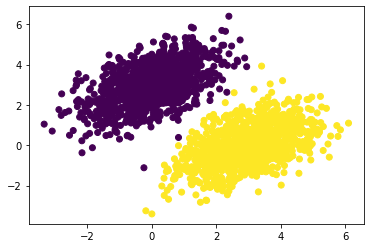

In [29]:
predictions = model(inputs)

plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0]>0.5)

plt.show()

Plotting the line that separates the two classes

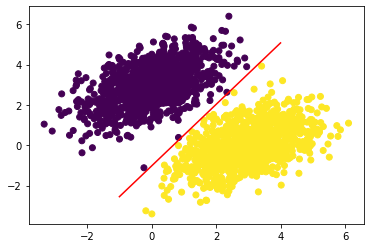

In [30]:
x = np.linspace(-1,4,100)

y = -W[0]/W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, "-r")

plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0]>0.5)

plt.show()
